#Methodology

 **Project Objective and Scope:**

* Objective: analyzing the Telco customer dataset with hope of gaining useful insights about customer churn. The goal is to identify patterns anf factors that might contribute to customer churn, and provide recommendations for customer retention to the best of our ability.
* The scope is to analyze, clean, and process the data and then build predictive models to identify customers who are likely to churn.

---

####1. Data Preprocessing
* **Normalisation:** Scale numerical characteristics like temperature and humidity for standardised analysis.
* **Data Cleaning:** Address missing values, fix inconsistencies, and guarantee data quality.
* **Feature Engineering:** Construct new features, such seasonal trends or fire danger indices, from the data that already exists.

---

#### 2. Exploratory Data Analysis (EDA)

* using visualisation paralelly with statistical techniques to understand the distribution, relationships between data, and patterns that could be exploited.



3.	Exploratory Data Analysis (EDA):
	•	Use visualizations and statistical techniques to understand the distribution, relationships, and patterns within the data.
4.	Data Mining Techniques:
	•	Experiment with different data mining techniques (classification, clustering, regression, etc.).
	•	Choose the appropriate technique based on the problem and dataset.
5.	Model Evaluation:
	•	Use appropriate evaluation metrics (accuracy, precision, recall, F1-score, ROC curve, etc.).
	•	Compare different models and select the best one.
6.	Results Communication:
	•	Clearly explain the findings and insights.
	•	Provide recommendations for action based on the results.
7.	Documentation:
	•	Document the entire process, including the code and visualizations.
	•	Share the code through a GitHub repository.





# Importing relevant libraries

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


#Data Collection and Preprocessing



In [ ]:
# Loading the Data
telco_data = pd.read_csv('Telco_dataset.csv')

In [ ]:
# Handling Missing Values
telco_data.isnull().sum()
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data = telco_data.dropna()

In [ ]:
#encoding categorical variables
telco_data = pd.get_dummies(telco_data, drop_first=True)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
telco_data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(telco_data[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [ ]:
#preview of the dataset info
print(telco_data.describe)
print(telco_data.info())

<bound method NDFrame.describe of       SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0                 0 -1.280248       -1.161694     -0.994194   
1                 0  0.064303       -0.260878     -0.173740   
2                 0 -1.239504       -0.363923     -0.959649   
3                 0  0.512486       -0.747850     -0.195248   
4                 0 -1.239504        0.196178     -0.940457   
...             ...       ...             ...           ...   
7038              0 -0.343137        0.664868     -0.129180   
7039              0  1.612573        1.276493      2.241056   
7040              0 -0.872808       -1.170004     -0.854514   
7041              1 -1.158016        0.319168     -0.872095   
7042              0  1.368109        1.357932      2.012344   

      customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                     False                  False                  False   
1                     False                  False     

This gives us a basic overview of the information inside the dataset, including the data types and non-null counts of each collumn. It seems that the data is crispy clean and does not need to be checked for missing values. But just to be sure, we can do that like so:

# Exploratory Data Analysis (EDA)

In [ ]:
#quick summary
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
mean,0.162400,-1.126643e-16,6.062651e-17,-1.119064e-16
std,0.368844,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,0.000000,9.199259e-01,8.331482e-01,6.668271e-01
max,1.000000,1.612573e+00,1.793381e+00,2.824261e+00


In [ ]:
print(telco_data.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       ...
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object', length=7062)


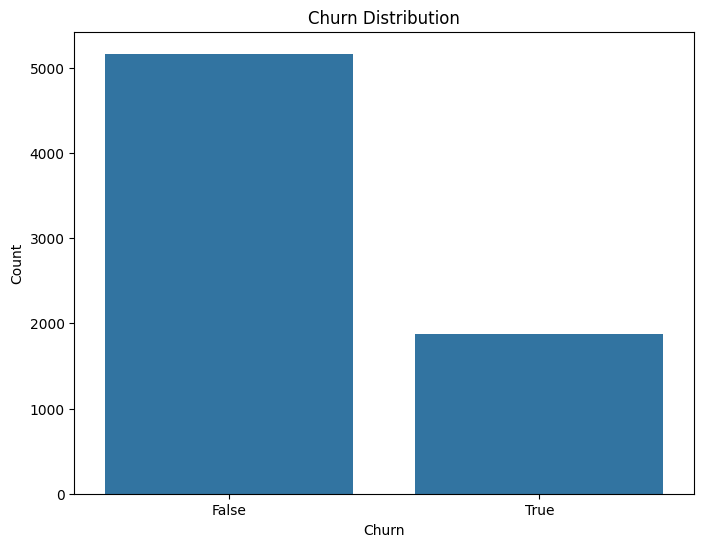

In [ ]:
#adding churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn_Yes', data=telco_data)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()



We use the correlation matrix here hoping that it'll help us identify relationships betweeen different numerical features.

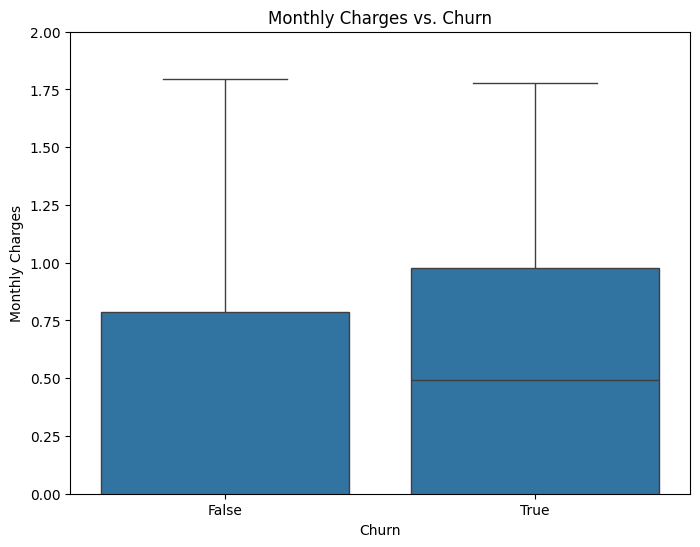

In [19]:
#monthly charges & churn relationship in a graph
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=telco_data)
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.ylim(0, 2)

plt.show()

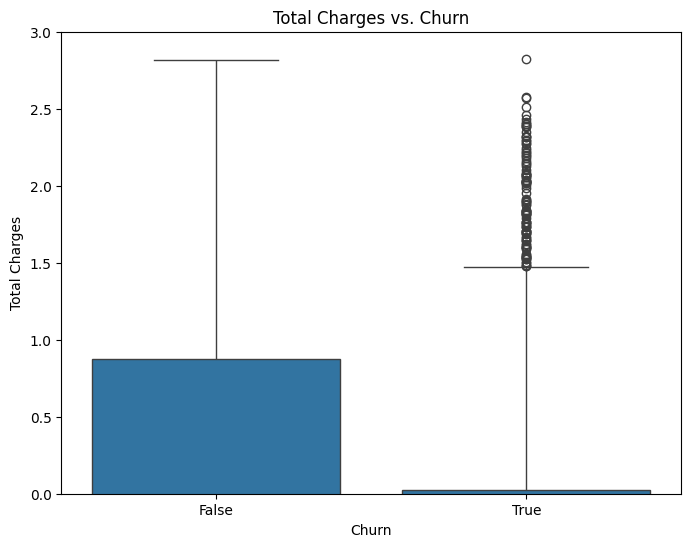

In [18]:
#total charges comp. to churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='TotalCharges', data=telco_data)
plt.title('Total Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.ylim(0, 3)

plt.show()

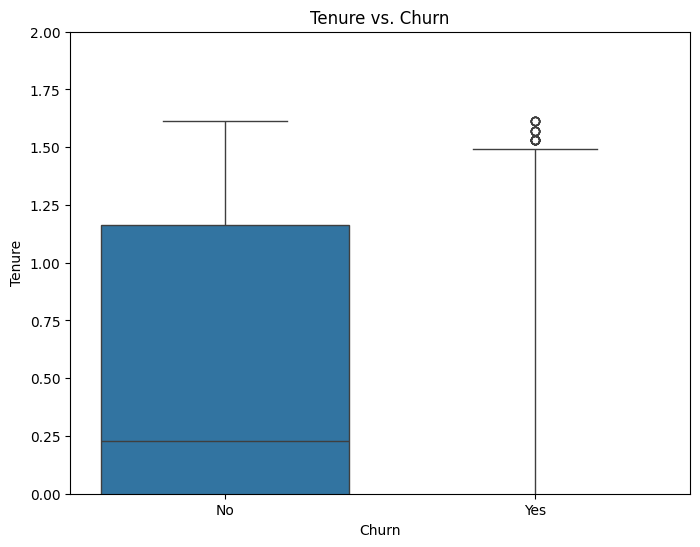

In [17]:
#tenure and churn comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn_Yes', y='tenure', data=telco_data)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Tenure')
plt.ylim(0, 2)
plt.show()

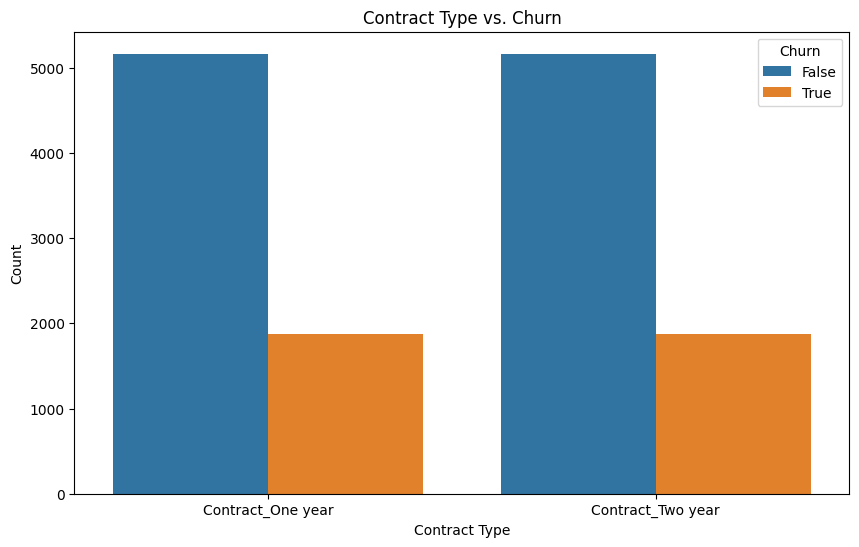

In [23]:
#contract type and churn comparison
plt.figure(figsize=(10, 6))
melted_data = pd.melt(telco_data, id_vars=['Churn_Yes'], value_vars=['Contract_One year', 'Contract_Two year'], var_name='Contract Type', value_name='Value')

sns.countplot(x='Contract Type', hue='Churn_Yes', data=melted_data)
plt.title('Contract Type vs. Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

This EDA step laid a solif foundation for next stages of feature selection as well as model building.  These insights will guide the selection of appropriate data mining techniques and the development of predictive models to address the churn issue effectively.

# Data Mining Techniques


##Feature Selection


In [27]:
X = telco_data.drop('Churn_Yes', axis=1)
y = telco_data['Churn_Yes']
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)


##Logistics Regression

In [32]:
#using logistics regression as first prediction tool
X = telco_data.drop('Churn_Yes', axis=1)
y = telco_data['Churn_Yes']

In [33]:
#spliting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# LRModel
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


In [38]:
# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')


Accuracy: 0.7953
Precision: 0.6381
Recall: 0.5312
F1-Score: 0.5798
ROC-AUC: 0.8390


Based on these findings, our first attempt is accurate around 79% of the time, yet only 63% of predicted churns are correct. This is not a high enough figure to deem it useful at this stage. We also receive recall, which measures proportion of actual churn cases which are predicted correctly. A 53% is not the best result.

F1-Score is the harmonic mean of precision and recall, and finally ROC-AUC (Receiver Operating Characteristic - Area Under the Curve), measures the model's ability to distinguish between churn and non-churn customers. An ROC-AUC of 0.8390 suggests that the model has good discriminative ability.

## Gradient Boosting

In [41]:
X = telco_data.drop('Churn_Yes', axis=1)
y = telco_data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')


Accuracy: 0.7967
Precision: 0.6602
Recall: 0.4848
F1-Score: 0.5591
ROC-AUC: 0.8401


This approach yielded a similar result, with a slight deviation for the recall and f1-score values. With a recall of less than 50% it does not seem to improve.

#Visualisation

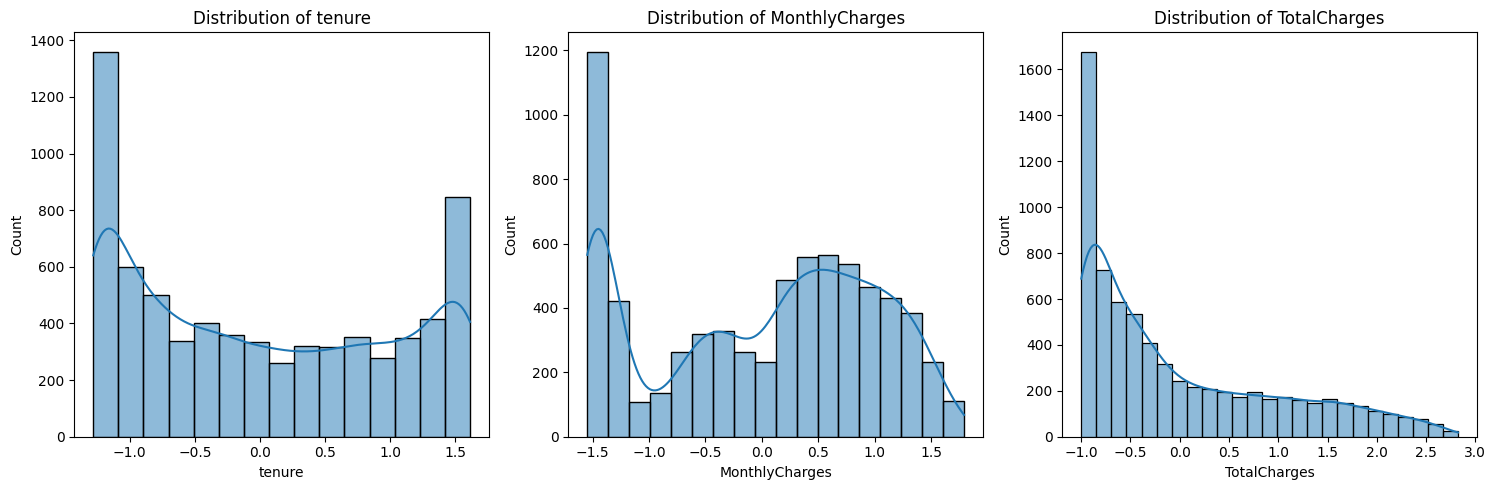

In [49]:
# Visualizing the distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(telco_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [50]:
# Select only numerical columns for correlation calculation
numerical_data = telco_data.select_dtypes(include=['number'])


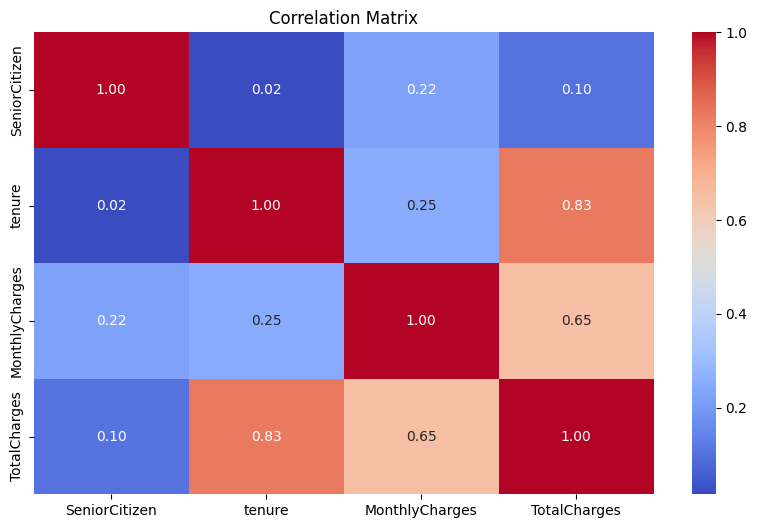

In [51]:
# Correlation matrix + visualisation
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Findings
1. This dataset shows average customer churn rates of 27%, which is not considered low but also not high. It means more than one in every 4 customers churn.
2. Notable features included 'Contract', 'monthlycharges', and 'totalcharges', which helped us notice that customers that have a month-to-month contract are more likely to churn
3.  Shorter tenure tends to correlate with higher churn rates, indicating that early customer engagement is critical for retention.

###Key visualzation tools used:
* Churn Distribution
* Correlation Matrix
* Monthly Charges and Churn
* Tenure and Churn
* Contract Type and Churn

### Recommendations

Based on the findings above, I would recommend the following in order to improve customer retention:
1. Promotional offers and discounts for people who have been a customer for over a year.
2. Offering bundle offers for long-time customers, seniors, etc. For example: seniors could automatically bnefit from a free streaming access, and 2nd year clients could be offered discount prices.
3. Executing targeted marketing campaings

### Conclusion

In Conclusion, the analysis executed onto the Telco dataset has revealed key points, such as that churn factors are relatively higher in some customer ranges as compared to others.  By focusing on contract types, pricing strategies, and customer engagement initiatives, the company can strategically reduce churn rates and enhance overall customer retention, leading to improved business performance and customer satisfaction.

-

In [ ]:
#converting Y/N to numeric
#data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})
#data["gender"] = data["gender"].map({"Male": 1, "Female": 0})
#data["Partner"] = data["Partner"].map({"Yes": 1, "No": 0})
#data["Dependents"] = data["Dependents"].map({"Yes": 1, "No": 0})
#data["PhoneService"] = data["PhoneService"].map({"Yes": 1, "No": 0})
#data["MultipleLines"] = data["MultipleLines"].map({"Yes": 1, "No": 0, "No phone service": 0})
#data["InternetService"] = data["InternetService"].map({"DSL": 1, "Fiber optic": 2, "No": 0})
#data["OnlineSecurity"] = data["OnlineSecurity"].map({"Yes": 1, "No": 0, "No internet service": 0})
#data["OnlineBackup"] = data["OnlineBackup"].map({"Yes": 1, "No": 0, "No internet service": 0})
#data["DeviceProtection"] = data["DeviceProtection"].map({"Yes": 1, "No": 0, "No internet service": 0})
#data["TechSupport"] = data["TechSupport"].map({"Yes": 1, "No": 0, "No internet service": 0})
#data["StreamingTV"] = data["StreamingTV"].map({"Yes": 1, "No": 0, "No internet service": 0})
#data["StreamingMovies"] = data["StreamingMovies"].map({"Yes": 1, "No": 0, "No internet service": 0})
#data["PaperlessBilling"] = data["PaperlessBilling"].map({"Yes": 1, "No": 0})
#data["PaymentMethod"] = data["PaymentMethod"].map({"Electronic check": 1, "Mailed check": 2, "Bank transfer (automatic)": 3, "Credit card (automatic)": 4})
#data["Contract"] = data["Contract"].map({"Month-to-month": 1, "One year": 2, "Two year": 3})

#for feature in categorical_features:
#    data_cleaned[feature] = data_cleaned[feature].astype('category')
#data_cleaned[feature] = data_cleaned[feature].astype('category')
#data_cleaned.head()